In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
#Загрузим DS формата csv

In [3]:
df = pd.read_csv(r"C:\Users\rocki\Downloads\used_cars_data.csv")

In [4]:
df

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1
...,...,...,...,...,...,...,...,...,...,...
787,787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá
788,788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans
789,789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró
790,790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [5]:
#Напишем функциб для определения кол-ва пропусков

In [6]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [7]:
draw_missing(df).round(1)


,Total,Percent
Unnamed: 0,0,0.0
brand,0,0.0
model,0,0.0
price (eur),0,0.0
engine,0,0.0
year,0,0.0
mileage (kms),0,0.0
fuel,0,0.0
gearbox,0,0.0
location,0,0.0


In [8]:
df.shape

(792, 10)

In [9]:
#Кол-во пропусков оказалось незначительным и не повлияет на общий анализ, поэтому их можно удалить

In [10]:
df = df.dropna ()

In [11]:
draw_missing(df).round(1)


,Total,Percent
Unnamed: 0,0,0.0
brand,0,0.0
model,0,0.0
price (eur),0,0.0
engine,0,0.0
year,0,0.0
mileage (kms),0,0.0
fuel,0,0.0
gearbox,0,0.0
location,0,0.0


In [12]:
#Посчитаем кол-во строк:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 792


In [13]:
# Список колонок
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'price (eur)', 'engine', 'year',
       'mileage (kms)', 'fuel', 'gearbox', 'location'],
      dtype='object')

In [14]:
# Список колонок с типами данных
df.dtypes


Unnamed: 0        int64
brand            object
model            object
price (eur)       int64
engine           object
year              int64
mileage (kms)     int64
fuel             object
gearbox          object
location         object
dtype: object

In [15]:
df

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1
...,...,...,...,...,...,...,...,...,...,...
787,787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá
788,788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans
789,789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró
790,790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [16]:
df.describe()


,Unnamed: 0,price (eur),year,mileage (kms)
count,792.000000,792.000000,792.000000,792.000000
mean,395.500000,15973.383838,2016.404040,83228.833333
std,228.774999,6984.338370,2.452251,46202.118589
min,0.000000,4990.000000,2004.000000,1258.000000
25%,197.750000,11355.000000,2015.000000,47145.500000
50%,395.500000,14990.000000,2017.000000,80065.500000
75%,593.250000,18490.000000,2018.000000,116321.750000
max,791.000000,82580.000000,2021.000000,220000.000000


In [17]:
# Определим уникальные значения для целевого признака
df['price (eur)'].unique()


array([ 8990,  9990, 13490, 24990, 10460,  8490, 23990, 14990, 19490,
       21990, 25490, 14490, 17990, 12990, 18490, 15990, 10490, 12880,
       16820,  9950, 14980, 11380, 13990, 12490, 57990, 16490, 18990,
       11490, 17490, 20990, 15490, 18960, 18890, 14970, 10570, 27990,
        7990, 30490, 11990, 26990,  5990, 14790, 22990, 16990, 24490,
        9490, 19990, 33990, 15770,  7670, 10260, 10370, 10120, 13290,
       18330, 14430, 10150, 11430, 10680, 10990, 17730, 11970, 25990,
       22490, 15880, 13270, 15290, 11280, 16980, 12350, 10980, 20490,
       21430, 29950, 24410, 10930, 14470, 16210, 16250, 48990,  6990,
       28380, 25330, 10880, 21490,  8680,  7490, 28990,  9290, 41990,
       39990,  8210, 29990, 58990, 34990, 30990, 19970, 11180, 23490,
       23460, 13580, 14480, 82580, 31990, 18970, 36990, 33860, 19590,
       18780, 11790, 17360, 17290, 34490, 14590, 28490, 32490, 16710,
        8790, 38490, 13470, 17180, 24790, 32990,  8290, 21790, 10520,
       10770, 20970,

C:\Users\rocki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price (eur)', ylabel='Density'>

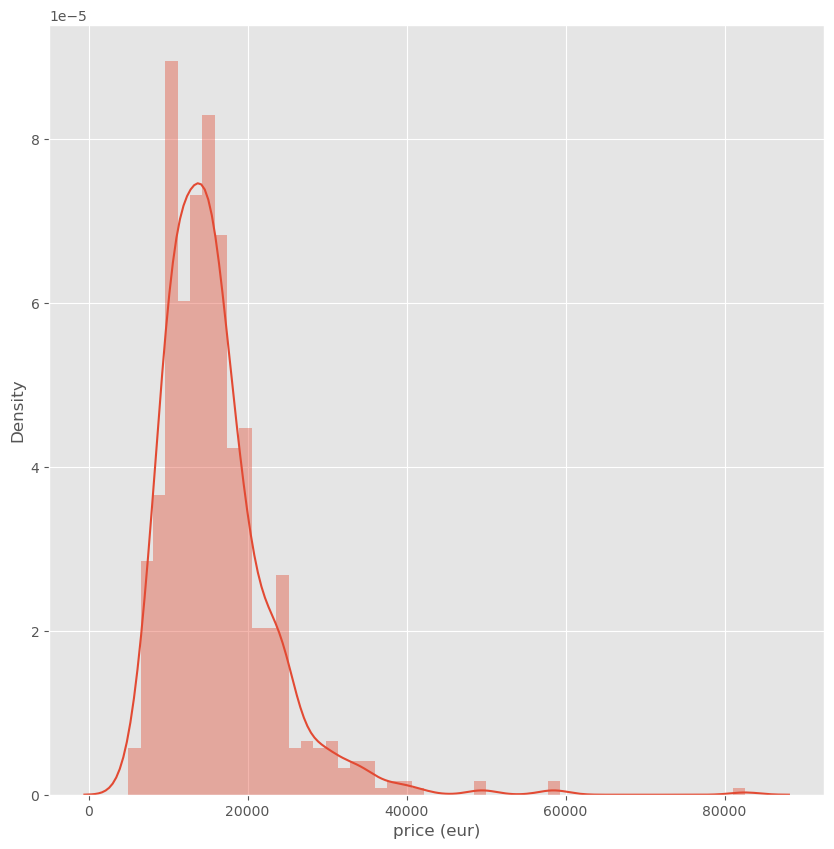

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['price (eur)'])

<AxesSubplot:xlabel='year', ylabel='mileage (kms)'>

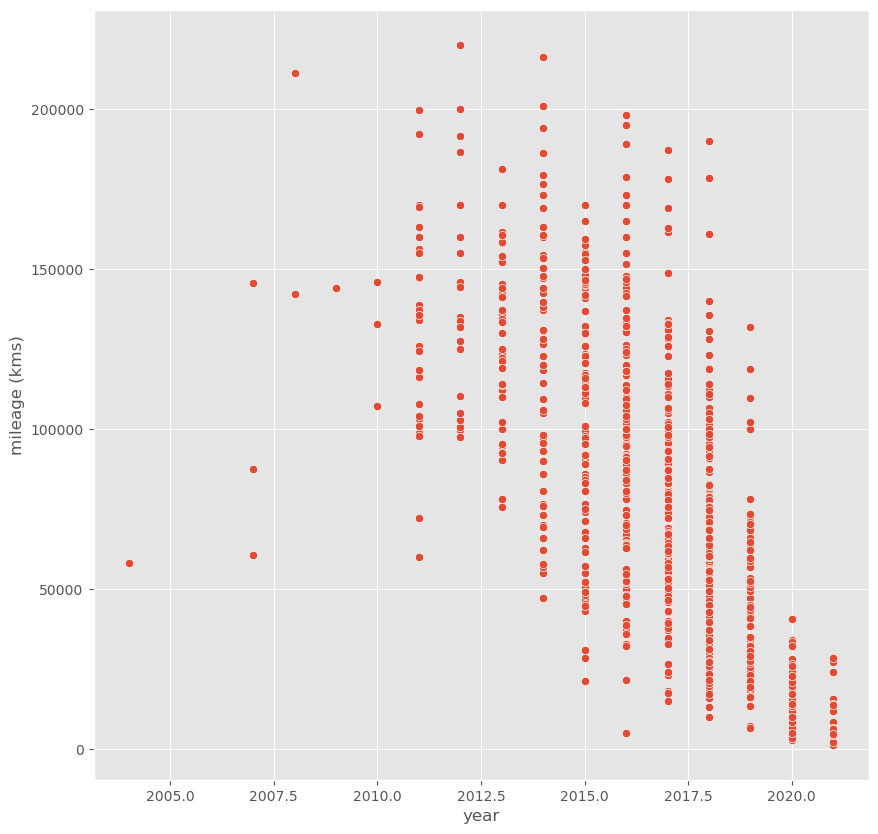

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='mileage (kms)', data=df)

<AxesSubplot:xlabel='year', ylabel='mileage (kms)'>

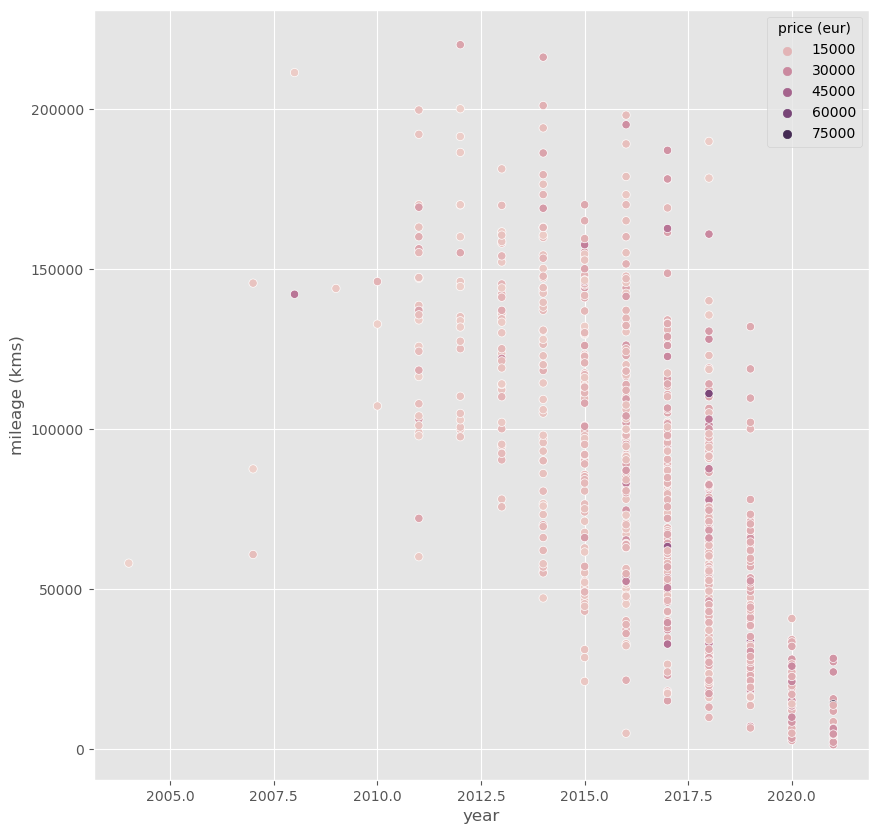

In [22]:
ig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='mileage (kms)', data=df, hue='price (eur)')

In [23]:
df = df.rename (columns= {'price (eur)': 'price'})

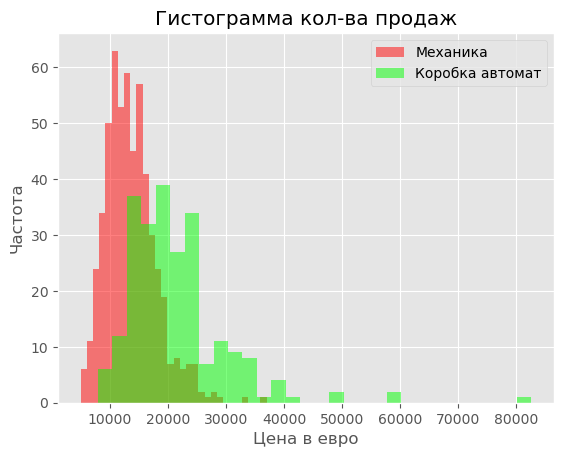

In [24]:
import matplotlib.pyplot as plt
m = plt.hist(df[df["gearbox"] == "Manual"].price,bins=30,fc = (1,0,0,0.5),label = "Механика")
b = plt.hist(df[df["gearbox"] == "Automatica"].price,bins=30,fc = (0,1,0,0.5),label = "Коробка автомат")
plt.legend()
plt.xlabel("Цена в евро")
plt.ylabel("Частота")
plt.title("Гистограмма кол-ва продаж")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]


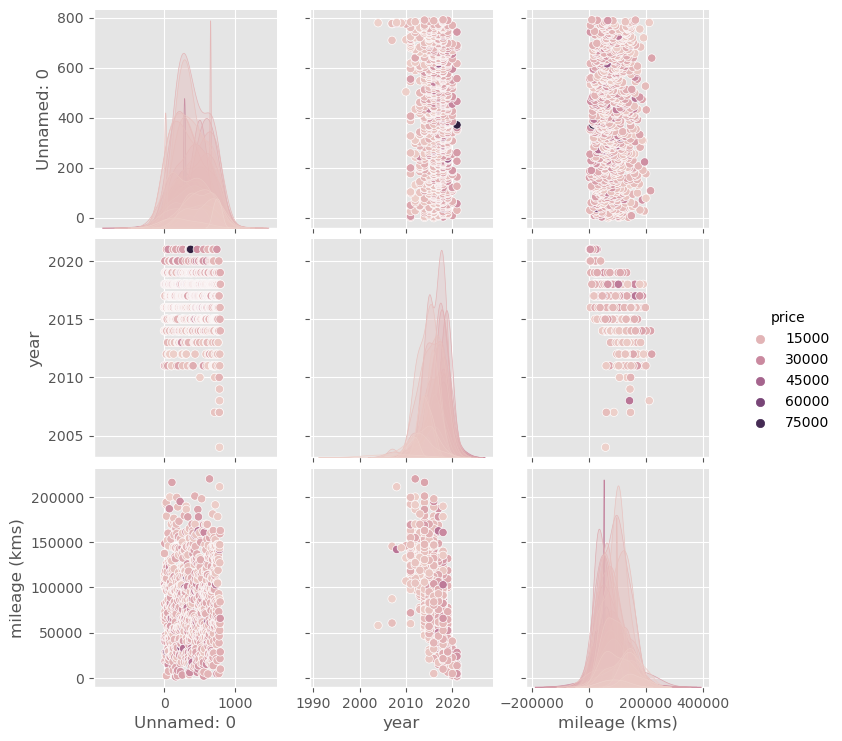

In [25]:
sns.pairplot(df, hue="price")

<AxesSubplot:xlabel='price'>

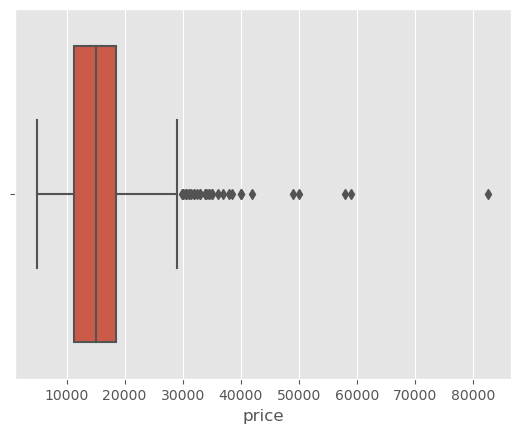

In [28]:
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='year', ylabel='price'>

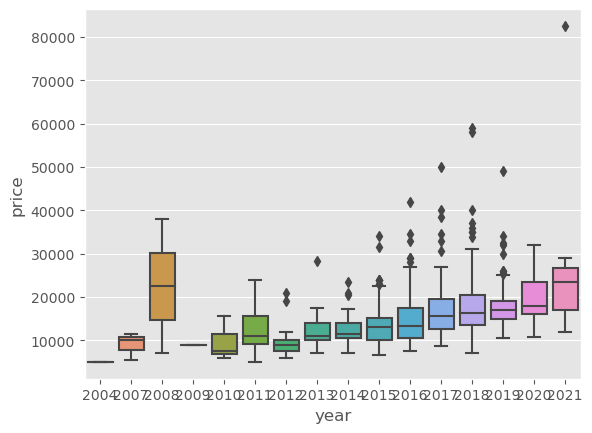

In [29]:
sns.boxplot(x='year', y='price', data=df)

<AxesSubplot:xlabel='year'>

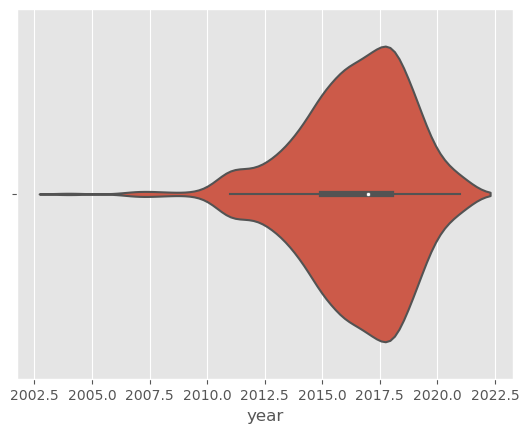

In [30]:
sns.violinplot(x=df['year'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'SEAT'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Volkswagen'),
  Text(4, 0, 'Opel'),
  Text(5, 0, 'Jeep'),
  Text(6, 0, 'Kia'),
  Text(7, 0, 'Land'),
  Text(8, 0, 'Nissan'),
  Text(9, 0, 'Fiat'),
  Text(10, 0, 'Ford'),
  Text(11, 0, 'Citroen'),
  Text(12, 0, 'Toyota'),
  Text(13, 0, 'Peugeot'),
  Text(14, 0, 'Dacia'),
  Text(15, 0, 'Mini'),
  Text(16, 0, 'Renault'),
  Text(17, 0, 'Subaru'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Mercedes'),
  Text(20, 0, 'Mazda'),
  Text(21, 0, 'Lexus'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Mitsubishi'),
  Text(24, 0, 'Alfa'),
  Text(25, 0, 'Jaguar'),
  Text(26, 0, 'Abarth'),
  Text(27, 0, 'Suzuki'),
  Text(28, 0, 'Ssangyong'),
  Text(29, 0, 'Honda'),
  Text(30, 0, 'Porsche'),
  Text(31, 0, 'Skoda'),
  Text(32, 0, '

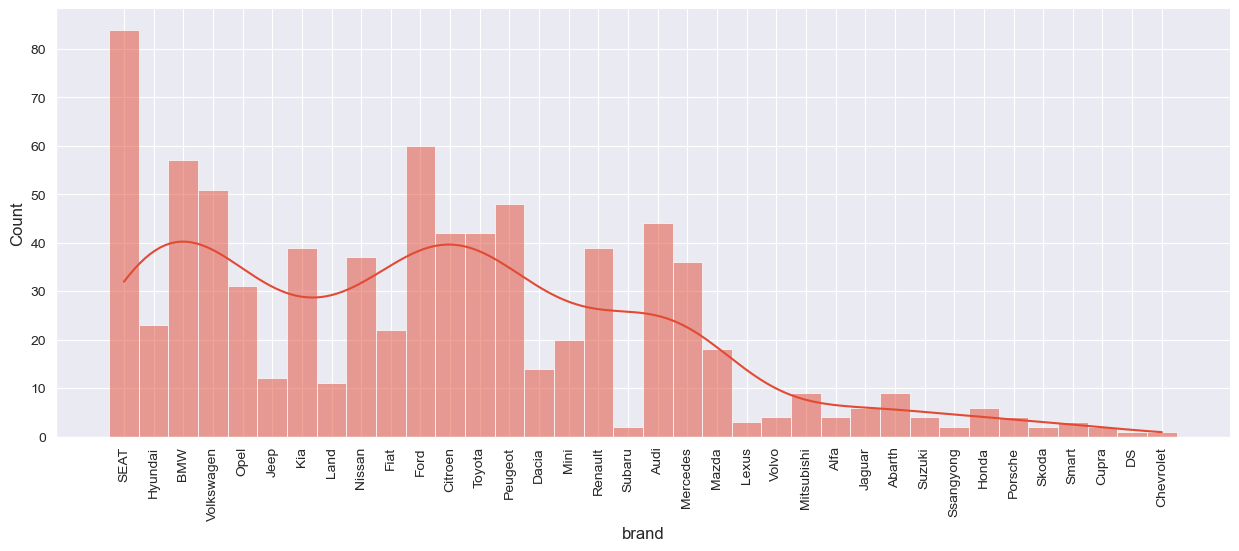

In [43]:
sns.set_style('darkgrid')

sns.displot(x='brand',
            bins = 20,
            kde=True,
            aspect=2.5,
            data=df)
plt.xticks(rotation=90)

<AxesSubplot:>

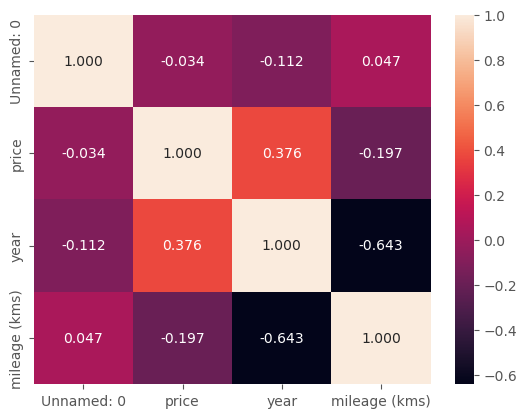

In [26]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.3f')